# MULTIPLE LINEAR REGRESSION
## Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## Task 1
### EDA


In [4]:
df.rename(columns = {'Age_08_04': 'Age'}, inplace = True)

In [5]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df['Price'].unique()

array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        8950,  9250,

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [13]:
df.dtypes

Price         int64
Age           int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

## Data visualization 

In [14]:
df.head(100)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
95,19950,17,30351,Diesel,90,0,1995,3,4,5,1260
96,15950,19,29435,Petrol,97,0,1400,3,4,5,1100
97,15950,19,25948,Petrol,97,0,1400,3,4,5,1100
98,18750,11,24500,Petrol,110,0,1600,3,4,5,1120


In [15]:
# first i have to make object coloumn into numeric columns 
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [16]:
data = pd.get_dummies(df, columns= ['Fuel_Type'], drop_first= True)
data

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


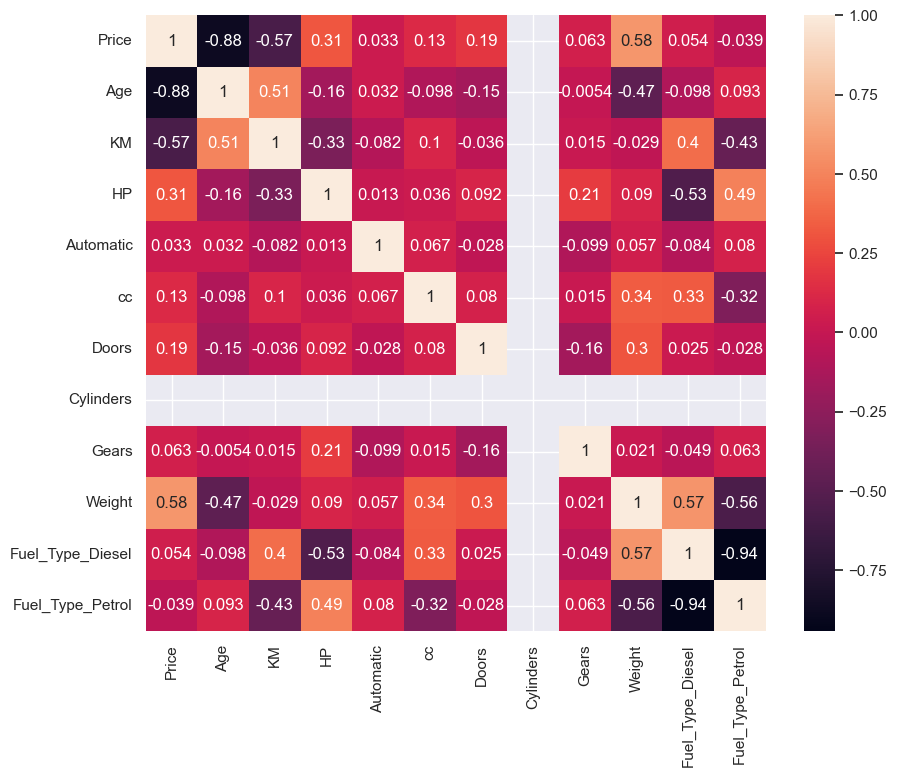

In [17]:
plt.figure(figsize= (10,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### 2 splitting data into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop('Price', axis = 1)
Y = data['Price']
X.shape ,Y.shape

((1436, 11), (1436,))

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state= 45)


## 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
model1.intercept_
for feature, coef in zip(X_train.columns, model1.coef_):
    print(f"{feature}: {coef}")

Age: -121.93454444742544
KM: -0.017784668924216512
HP: 19.55484228912502
Automatic: 266.25199499171947
cc: -0.011721268232894658
Doors: -41.4498561412216
Cylinders: -5.542233338928781e-13
Gears: 708.8636539757944
Weight: 21.11061561959331
Fuel_Type_Diesel: 261.9311776539388
Fuel_Type_Petrol: 1136.9371553740618


In [23]:
selected_cols=['Age','KM','Weight']
model2 = LinearRegression()
model2.fit(X_train[selected_cols],Y_train)
model2.intercept_
for feature , coef in zip(selected_cols, model2.coef_):
    print(f"{feature}:{coef}")

Age:-118.46656903406435
KM:-0.024705032951037452
Weight:18.602862698132714


In [24]:
selected_cols=['Age','KM','Weight','Automatic']
model3 = LinearRegression()
model3.fit(X_train[selected_cols],Y_train)
model3.intercept_
for feature , coef in zip(selected_cols, model3.coef_):
    print(f"{feature}:{coef}")

Age:-119.1518613410217
KM:-0.02442484724522058
Weight:18.414450575946688
Automatic:247.99483974018835


In [25]:
model4 = LinearRegression()
model4.fit(X_test,Y_test)
model4.intercept_
for feature, coef in zip(X_test.columns, model4.coef_):
    print(f" {feature}:{coef}")


 Age:-132.38744425267214
 KM:-0.013236621521844197
 HP:81.0890261898543
 Automatic:531.6575049389719
 cc:-6.076900070505905
 Doors:144.94566914264996
 Cylinders:-2.000888343900442e-11
 Gears:-165.99144700704153
 Weight:17.404018596970964
 Fuel_Type_Diesel:5198.273867885893
 Fuel_Type_Petrol:872.7051361248891


In [26]:
import statsmodels.formula.api as smf


In [27]:
mod = smf.ols('Price ~ Age + KM + Weight', data = df).fit()

In [28]:
mod.params

Intercept   -1880.335564
Age          -120.221174
KM             -0.024183
Weight         19.576043
dtype: float64

In [29]:
mod2= smf.ols('Price ~Age + KM + Weight + C(Fuel_Type)', data = df).fit()
mod2.params

Intercept                -9140.388272
C(Fuel_Type)[T.Diesel]    -436.973552
C(Fuel_Type)[T.Petrol]    1242.471319
Age                       -122.762277
KM                          -0.017207
Weight                      25.056592
dtype: float64

In [30]:
mod3 = smf.ols('Price~ Age + KM + Weight + HP + cc + C(Fuel_Type)', data = df).fit()
mod3.params

Intercept                -7073.646819
C(Fuel_Type)[T.Diesel]     630.682708
C(Fuel_Type)[T.Petrol]    1214.948241
Age                       -123.317391
KM                          -0.017484
Weight                      20.766793
HP                          25.274310
cc                          -0.045953
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = mod.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(Y_test, y_pred)
print("R-squared (R²):", r2)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 2280760.723901439
R-squared (R²): 0.8570369401150268
Mean Absolute Error (MAE): 1017.42842880338


## Finding Rasso and Ridge

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,Y_train)
print(ridge.coef_)
print(ridge.intercept_)

[-1.21861501e+02 -1.78638222e-02  1.95138048e+01  2.58704432e+02
 -1.08266076e-02 -4.18069417e+01  0.00000000e+00  6.94058454e+02
  2.11082900e+01  1.71998676e+02  1.04515360e+03]
-10101.567560063053


In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,Y_train)
lasso.intercept_
lasso.coef_

array([-1.21915822e+02, -1.77945372e-02,  1.95035658e+01,  2.63143040e+02,
       -1.12490059e-02, -4.15720938e+01,  0.00000000e+00,  7.06376897e+02,
        2.11252547e+01,  2.41884893e+02,  1.12026636e+03])

# INTERVIEW QUESTIONS

## 1.What is Normalization & Standardization and how is it helpful?


🔹 Normalization

Definition:
Normalization is the process of scaling data values to a specific range, usually [0, 1] or [-1, 1].


Use case:

When features have different scales (e.g., age in years vs. salary in ₹).

Algorithms that rely on distance (like KNN, K-Means, Neural Networks) perform better when features are in a similar range.

🔹 Standardization

Definition:
Standardization rescales the data so that it has mean = 0 and standard deviation = 1 (called a z-score transformation).


Use case:

For algorithms that assume normally distributed data (e.g., Linear Regression, Logistic Regression, PCA).

Keeps outliers less distorted compared to normalization.

✅ Why it’s helpful

Puts all features on a comparable scale.

Speeds up gradient descent convergence in ML models.

Prevents features with large values from dominating the model.

Improves model performance and stability.



## 2.What techniques can be used to address multicollinearity in multiple linear regression?



🔹 What is Multicollinearity?

It occurs when two or more independent variables are highly correlated with each other.

This makes it hard for the model to estimate the effect of each variable accurately.

🔹 Why it’s a problem

Inflates standard errors of coefficients.

Makes coefficients unstable or with wrong signs.

Reduces interpretability and may hurt prediction performance.

| **Method**                                        | **Explanation**                                                                                                                                                   |
| ------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Remove one of the correlated variables**     | If two features have a high correlation (say > 0.8), drop one of them.                                                                                            |
| **2. Combine features**                           | Use feature engineering (e.g., take average or ratio of correlated columns).                                                                                      |
| **3. Use Principal Component Analysis (PCA)**     | PCA transforms correlated features into a smaller set of uncorrelated components.                                                                                 |
| **4. Regularization (Ridge or Lasso Regression)** | - **Ridge (L2 penalty)** shrinks correlated feature coefficients.<br> - **Lasso (L1 penalty)** can eliminate irrelevant features by setting coefficients to zero. |
| **5. Variance Inflation Factor (VIF)**            | Calculate VIF for each feature; if **VIF > 5 or 10**, it indicates high multicollinearity — consider removing that feature.                                       |
